STRUCTURE ATTRIBUTES

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
train_data = pd.read_csv('../data/train.csv',delimiter = ',')
train_data.head()

C:\Users\xavip\AppData\Local\Temp\ipykernel_66528\1865213414.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('../data/train.csv',delimiter = ',')


,Characteristics.LotFeatures,Characteristics.LotSizeSquareFeet,ImageData.c1c6.summary.bathroom,ImageData.c1c6.summary.exterior,ImageData.c1c6.summary.interior,ImageData.c1c6.summary.kitchen,ImageData.c1c6.summary.property,ImageData.features_reso.results,ImageData.q1q6.summary.bathroom,ImageData.q1q6.summary.exterior,...,Structure.FireplacesTotal,Structure.GarageSpaces,Structure.Heating,Structure.LivingArea,Structure.NewConstructionYN,Structure.ParkingFeatures,Structure.Rooms.RoomsTotal,Structure.YearBuilt,Tax.Zoning,UnitTypes.UnitTypeType
0,NaN,3200.0,NaN,NaN,NaN,NaN,NaN,"['Cooling.CeilingFans', 'Flooring.Carpet', 'Fl...",NaN,NaN,...,NaN,NaN,NaN,NaN,False,NaN,NaN,0.0,commr,NaN
1,NaN,NaN,NaN,3.8,3.7,3.8,3.8,"['Appliances.GasRange', 'Appliances.Range', 'A...",NaN,4.2,...,NaN,NaN,['natural gas'],3175.0,False,['off alley'],6.0,NaN,NaN,NaN
2,NaN,18750.0,NaN,NaN,NaN,NaN,NaN,"['Flooring.Carpet', 'ParkingFeatures.Garage', ...",NaN,NaN,...,NaN,NaN,NaN,NaN,False,NaN,NaN,1926.0,commr,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['CommunityFeatures.Lake', 'WaterfrontFeatures...",NaN,NaN,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,agric,NaN
4,"['horses allowed', 'paddock', 'pond(s)']",NaN,NaN,3.6,NaN,NaN,3.6,"['Appliances.Refrigerator', 'Appliances.Microw...",NaN,4.2,...,NaN,NaN,['other'],0.0,False,"['unassigned', 'off street']",4.0,2006.0,NaN,NaN


In [22]:
train_data.columns

Index(['Characteristics.LotFeatures', 'Characteristics.LotSizeSquareFeet',
       'ImageData.c1c6.summary.bathroom', 'ImageData.c1c6.summary.exterior',
       'ImageData.c1c6.summary.interior', 'ImageData.c1c6.summary.kitchen',
       'ImageData.c1c6.summary.property', 'ImageData.features_reso.results',
       'ImageData.q1q6.summary.bathroom', 'ImageData.q1q6.summary.exterior',
       'ImageData.q1q6.summary.interior', 'ImageData.q1q6.summary.kitchen',
       'ImageData.q1q6.summary.property', 'ImageData.room_type_reso.results',
       'ImageData.style.exterior.summary.label',
       'ImageData.style.stories.summary.label', 'Listing.Dates.CloseDate',
       'Listing.ListingId', 'Listing.Price.ClosePrice',
       'Location.Address.CensusBlock', 'Location.Address.CensusTract',
       'Location.Address.City', 'Location.Address.CountyOrParish',
       'Location.Address.PostalCode', 'Location.Address.PostalCodePlus4',
       'Location.Address.StateOrProvince',
       'Location.Address.Stre

In [34]:
#dame aquellas caractericas que empieza por Structure
structure = train_data.filter(regex='^Structure', axis=1)
structure.columns

Index(['Structure.Basement', 'Structure.BathroomsFull',
       'Structure.BathroomsHalf', 'Structure.BedroomsTotal',
       'Structure.BelowGradeFinishedArea',
       'Structure.BelowGradeUnfinishedArea', 'Structure.Cooling',
       'Structure.FireplacesTotal', 'Structure.GarageSpaces',
       'Structure.Heating', 'Structure.LivingArea',
       'Structure.NewConstructionYN', 'Structure.ParkingFeatures',
       'Structure.Rooms.RoomsTotal', 'Structure.YearBuilt'],
      dtype='object')

In [37]:
structure['Structure.Cooling']

0         1
1         1
2         1
3         1
4         0
         ..
107432    1
107433    1
107434    1
107435    1
107436    1
Name: Structure.Cooling, Length: 107437, dtype: int64

In [38]:
#structure['Structure.Cooling'] = structure['Structure.Cooling'].apply(lambda x: 0 if 'none' in str(x) else 1)
structure['Structure.Cooling'].value_counts()

Structure.Cooling
1    102026
0      5411
Name: count, dtype: int64

In [24]:
#para cada feature de structure dame el unique
for feature in structure.columns:
    print(feature)
    print(structure[feature].unique())

Structure.Basement
[nan "['partial']" "['full']" "['none']" "['full', 'english']"
 "['english']" "['full', 'walkout']" "['walkout']"
 "['partial', 'english']" "['partial', 'walkout']" "['walkout', 'full']"
 "['full', 'partial']" "['walkout', 'partial']"]
Structure.BathroomsFull
[nan  2.  1.  7.  3.  4.  5.  6.  0.  8.  9. 11. 13. 75.]
Structure.BathroomsHalf
[nan  1.  0.  2.  4.  3.  5.  9.]
Structure.BedroomsTotal
[nan  1.  2.  5.  4.  3.  6.  9.  8. 11.  7. 10.  0. 12. 14. 15. 13. 18.
 16.]
Structure.BelowGradeFinishedArea
[  nan 4384. 1293. ... 1836. 2907. 1885.]
Structure.BelowGradeUnfinishedArea
[  nan    0. 1703. ... 1797.  596. 1484.]
Structure.Cooling
["['central air']" "['window/wall unit - 1']" nan "['partial', 'none']"
 "['central air', 'zoned']" "['central air', 'zoned', 'ceiling fan(s)']"
 "['central individual']" "['none']" "['office only']"
 "['central individual', 'office only', 'partial']"
 "['window/wall units - 2']" "['window unit(s)']"
 "['central air', 'window unit

In [15]:
def clean_basement_value(value):
    if pd.isnull(value):
        return 'none'  # Considerar valores NaN como 'none'
    # Eliminar los caracteres no deseados y devolver como una cadena
    cleaned_value = value.strip("[]'").replace("'", "").replace(" ", "")
    return cleaned_value

# Aplicar la función de limpieza a la columna 'Structure.Basement'
train_data["Structure.Basement"] = train_data["Structure.Basement"].apply(clean_basement_value)

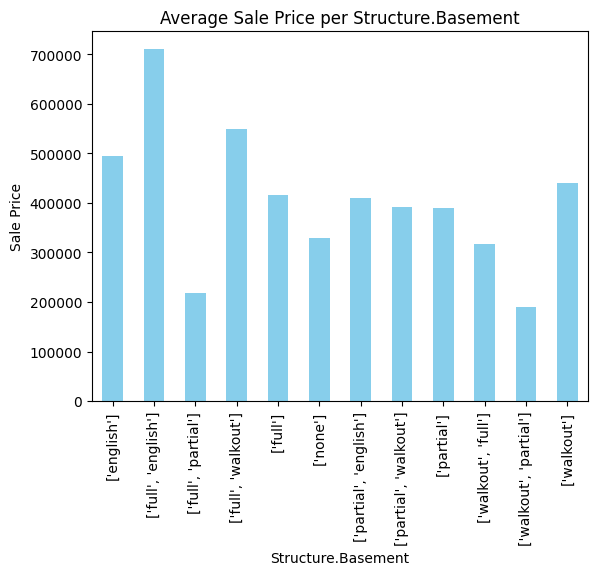

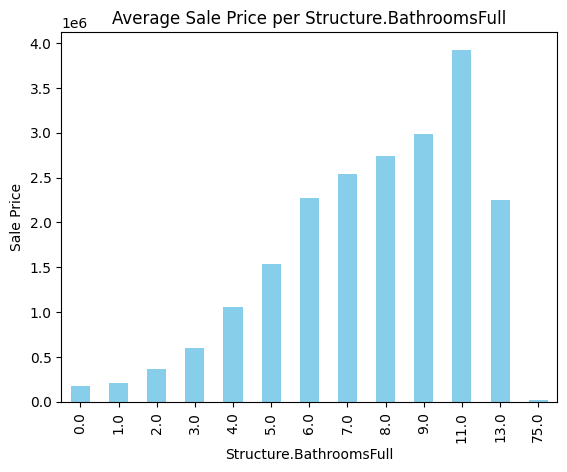

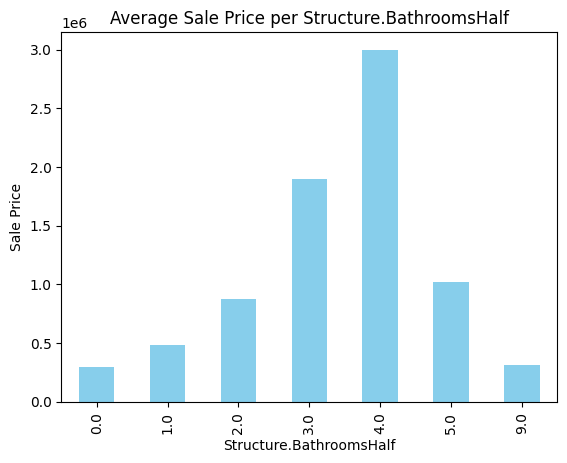

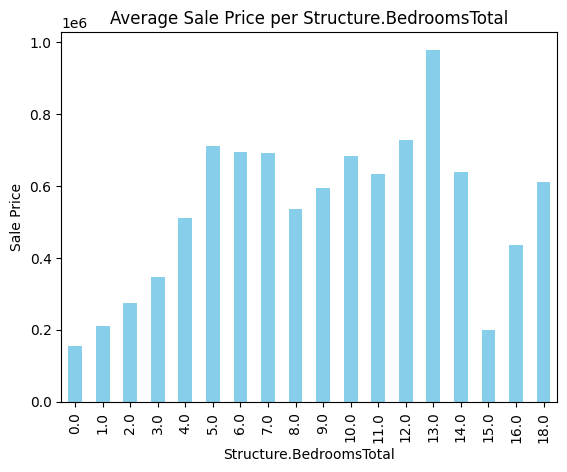

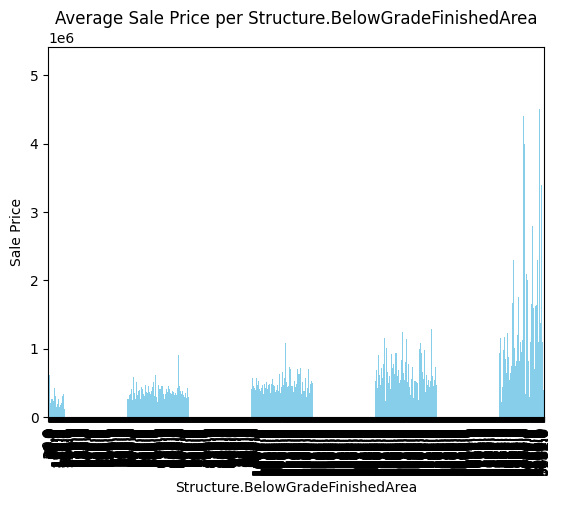

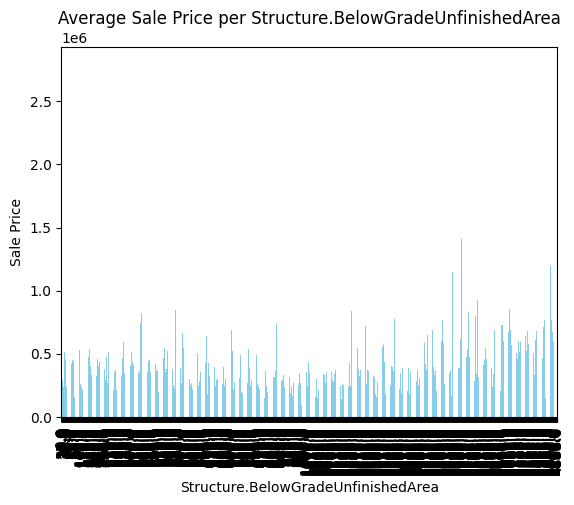

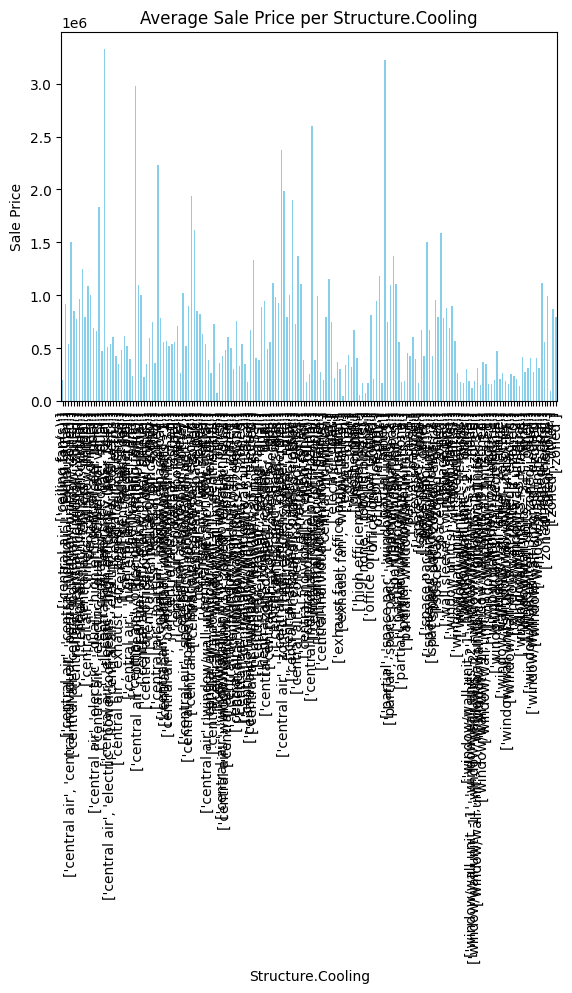

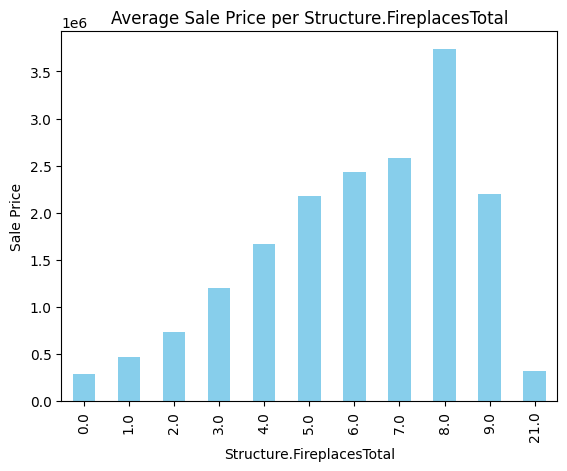

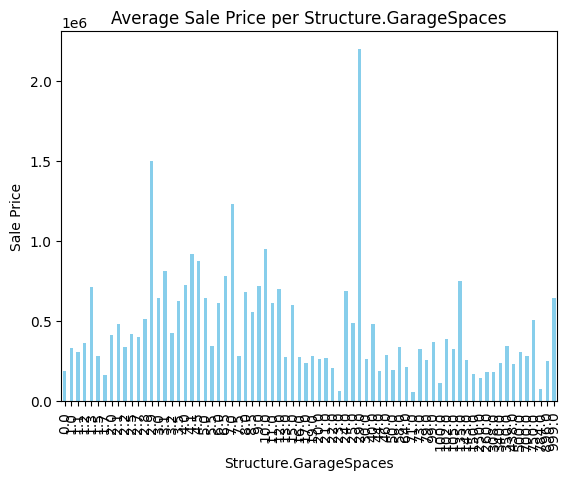

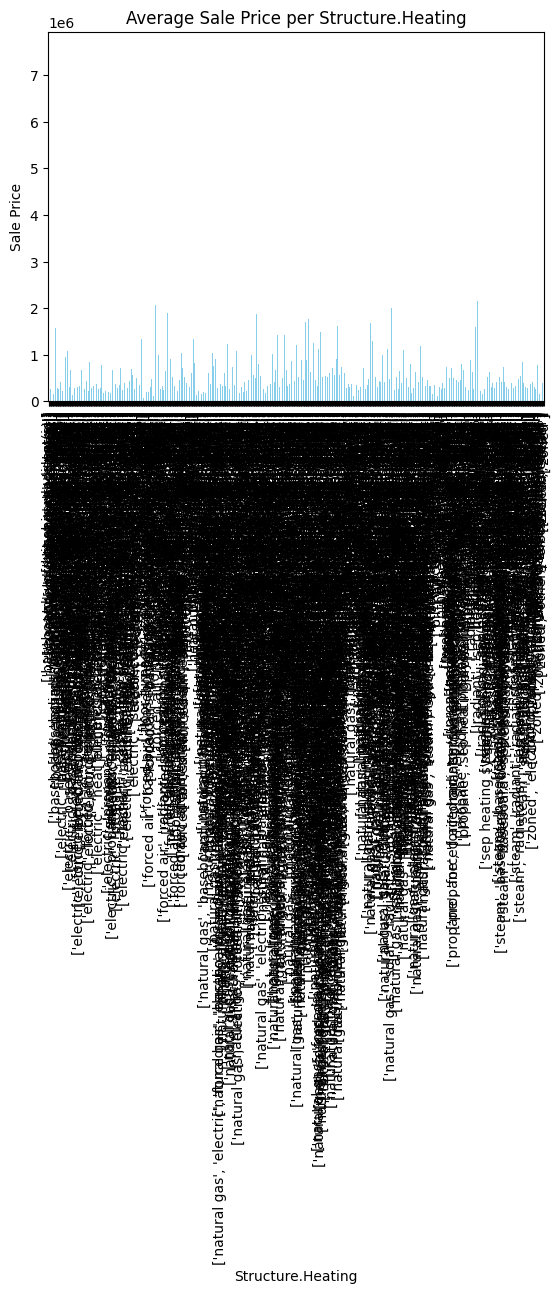

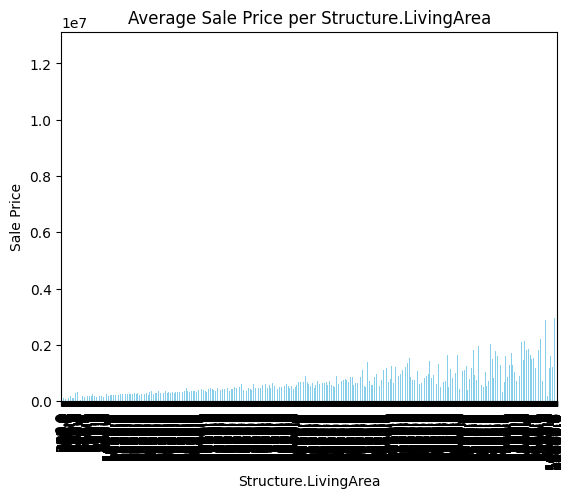

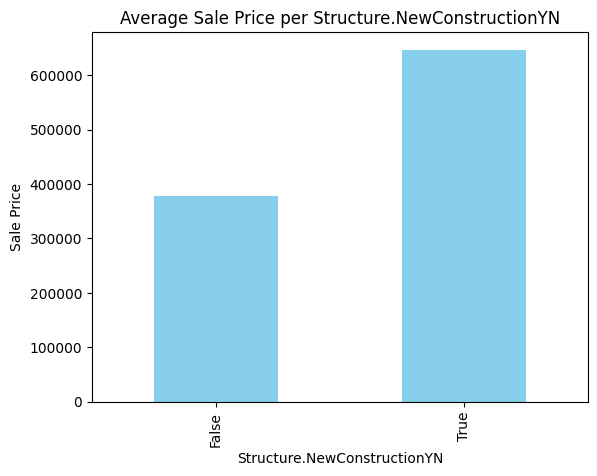

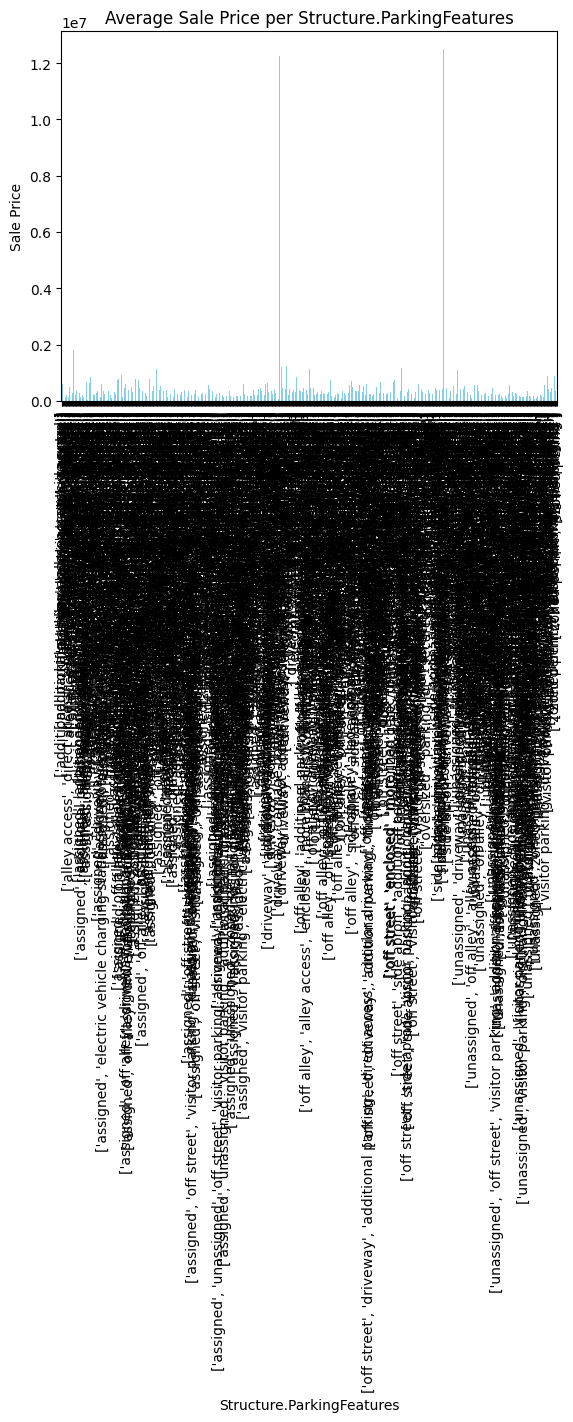

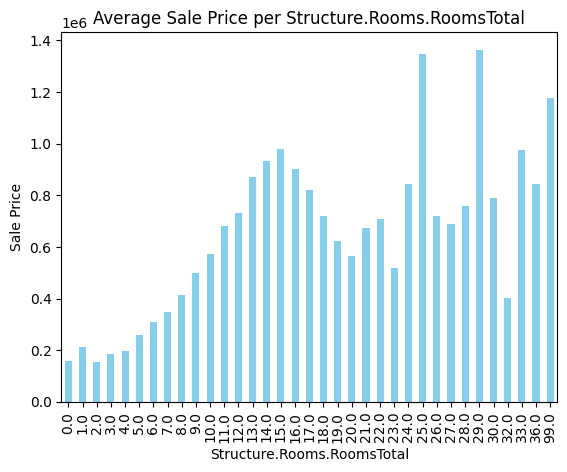

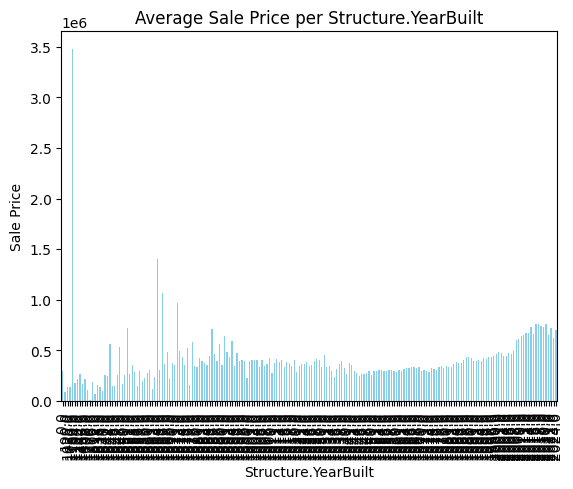

In [26]:
#funcion que muestre un grafico que muestre cada categoria con el precio medio de esa categoria
def plot_avg_price_per_category(data, category):
    data.groupby(category)["Listing.Price.ClosePrice"].mean().plot(kind='bar', color='skyblue')
    plt.ylabel('Sale Price')
    plt.title('Average Sale Price per {}'.format(category))
    plt.show()

#hazme estos graficos para cada feature en structure
for feature in structure.columns:
    plot_avg_price_per_category(train_data, feature)